#Lab 2 - Alaa Hallak
## Data Science Process in Python

##Step 0: Import Libraries

In [ ]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style="ticks")
%matplotlib inline

# Step 1: Scoping the Problem

1.   Define the Objective: Ask: What engineering question are we solving?

      **Given historical household electricity usage and contextual features (time, day, month, weekend), predict the next period’s Global Active Power consumption?**

2. Identify Inputs and Outputs

      **Inputs (features)**: what data we can measure. Voltage, current, temperature, signal strength, sensor readings.

      **Output (target)**: what we want to predict. Target: Global_active_power

3. Determine Problem Type

      **Regression** → Predict a continuous value (e.g., energy consumption in kWh).

      **Classification** → Predict a category (e.g., device “normal” vs. “faulty”).

      **Clustering/Anomaly Detection**→ Find unusual patterns in sensor signals.

      **Time Series Forecasting** → Predict future values (e.g., next 24h power usage).


##Step 2: Data Collection/Acquisition

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/ECE333 labs/household_power_consumption.txt", sep=';', na_values='?')
print(df.head(20))
print(df.tail(20))


          Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0   16/12/2006  17:24:00                4.216                  0.418   234.84   
1   16/12/2006  17:25:00                5.360                  0.436   233.63   
2   16/12/2006  17:26:00                5.374                  0.498   233.29   
3   16/12/2006  17:27:00                5.388                  0.502   233.74   
4   16/12/2006  17:28:00                3.666                  0.528   235.68   
5   16/12/2006  17:29:00                3.520                  0.522   235.02   
6   16/12/2006  17:30:00                3.702                  0.520   235.09   
7   16/12/2006  17:31:00                3.700                  0.520   235.22   
8   16/12/2006  17:32:00                3.668                  0.510   233.99   
9   16/12/2006  17:33:00                3.662                  0.510   233.86   
10  16/12/2006  17:34:00                4.448                  0.498   232.86   
11  16/12/2006  17:35:00    

##Step 3: Analyse Data

data preprocessing

In [ ]:
df.info()
df.shape
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


Data Conversion

In [ ]:
#Time series
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df = df.drop(columns=['Date', 'Time'])

In [ ]:
df.dtypes


,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
DateTime,datetime64[ns]


In [ ]:
df.head(100)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
95,4.224,0.090,231.96,18.2,0.0,1.0,16.0,2006-12-16 18:59:00
96,4.070,0.088,231.99,17.4,0.0,1.0,17.0,2006-12-16 19:00:00
97,3.612,0.090,232.36,15.6,0.0,2.0,16.0,2006-12-16 19:01:00
98,3.458,0.090,232.71,14.8,0.0,1.0,17.0,2006-12-16 19:02:00


In [ ]:
df = df.set_index('DateTime')

###Exploratory Data Analysis (EDA)

Data Visualization

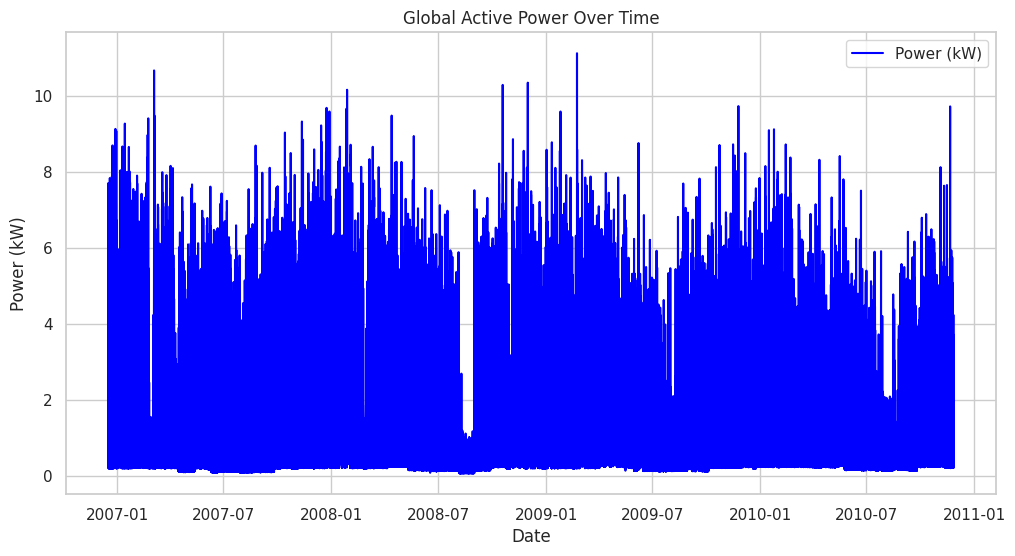

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DateTime', y='Global_active_power', label='Power (kW)', color='blue')

plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.title('Global Active Power Over Time')

plt.show()

###1. Time Series Line Plot of Global Active Power
####This plot tracks the household’s total active power usage (in kilowatts) over time—typically aggregated daily.

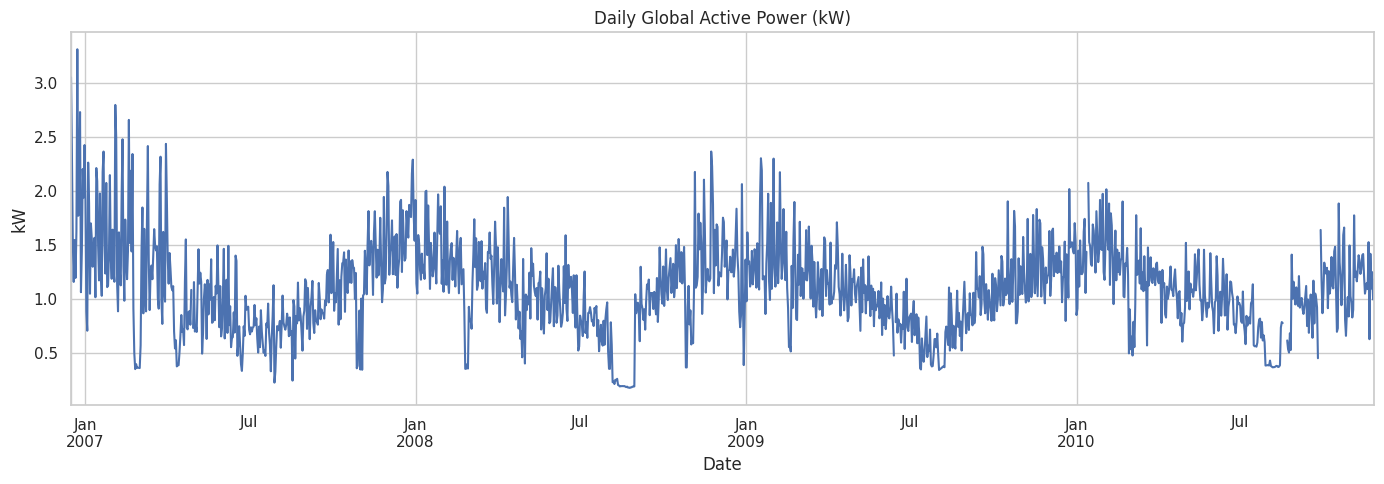

In [ ]:

# Resample to daily average
daily_power = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(14, 5))
daily_power.plot()
plt.title('Daily Global Active Power (kW)')
plt.ylabel('kW')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


###2. Sub-Metering Usage Comparison
####  Comparison of Sub-Metering Totals (Kitchen, Laundry, and HVAC)

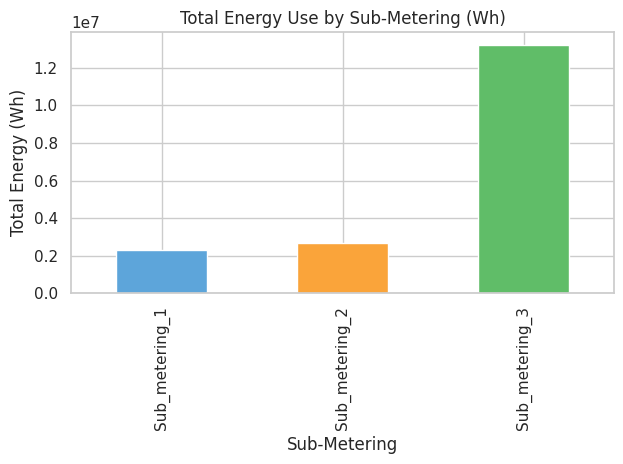

In [ ]:
#Bar Chart
sub_metering_totals = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
sub_metering_totals.plot(kind='bar', color=['#5DA5DA','#FAA43A','#60BD68'])
plt.title("Total Energy Use by Sub-Metering (Wh)")
plt.xlabel("Sub-Metering")
plt.ylabel("Total Energy (Wh)")
plt.tight_layout()
plt.show()

###3. Voltage vs. Global Intensity Scatter Plot
#### This scatter plot maps the relationship between voltage (V) and current intensity (A) at each timestamp.

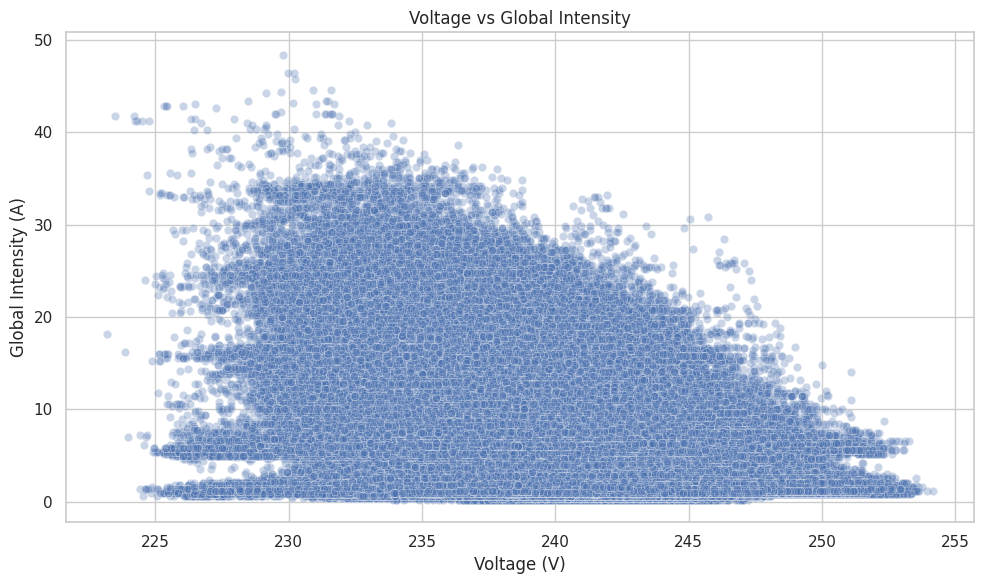

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Voltage', y='Global_intensity', data=df, alpha=0.3)
plt.title('Voltage vs Global Intensity')
plt.xlabel('Voltage (V)')
plt.ylabel('Global Intensity (A)')
plt.grid(True)
plt.tight_layout()
plt.show()

###4. Box Plot of Daily Energy Consumption
#### This plot summarizes the distribution of daily energy usage grouped by day of the week.

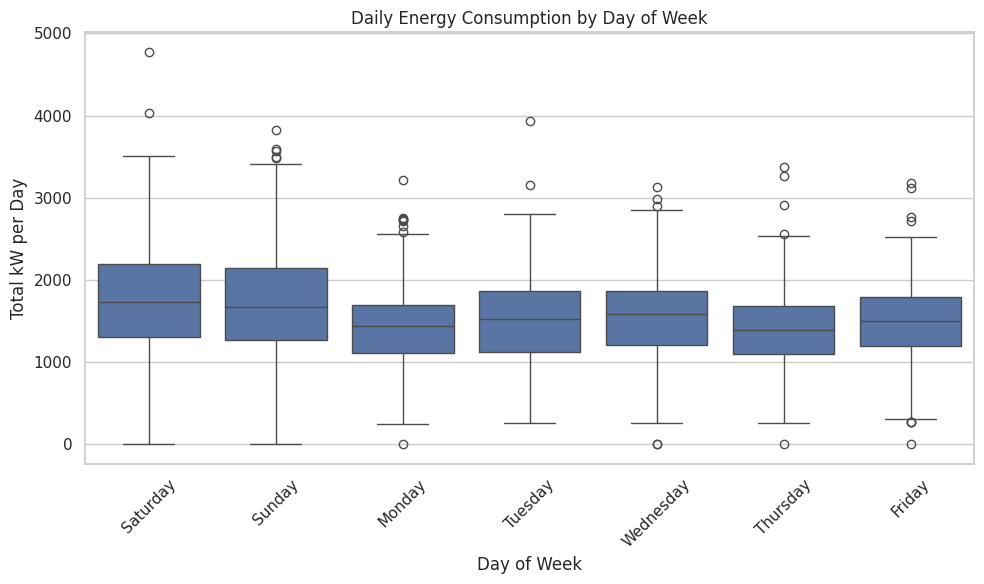

In [ ]:
# Aggregate daily total
df['Daily_energy'] = df['Global_active_power'].resample('D').sum()
df['Day_of_week'] = df.index.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_week', y='Daily_energy', data=df)
plt.title('Daily Energy Consumption by Day of Week')
plt.ylabel('Total kW per Day')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###5. Heatmap of Hourly Consumption Patterns
#### This heatmap visualizes average power usage by hour of day and day of week.

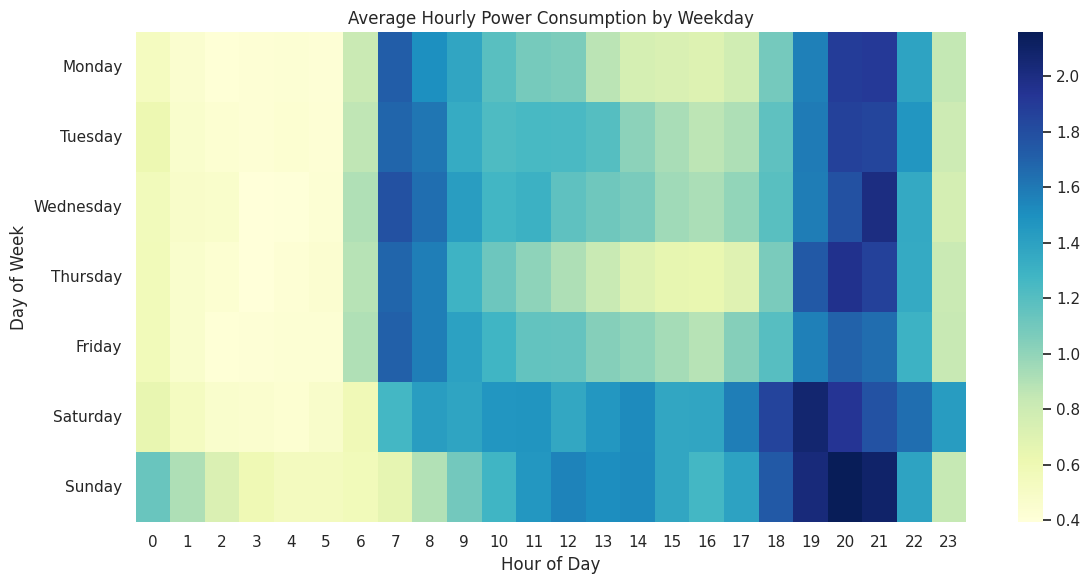

In [ ]:
# Create hour and weekday columns
df['Hour'] = df.index.hour
df['Weekday'] = df.index.day_name()

# Pivot table
heatmap_data = df.pivot_table(values='Global_active_power',
                              index='Weekday', columns='Hour', aggfunc='mean')

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Average Hourly Power Consumption by Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


### Advanced Preprocessing:  Feature Engineering

In [ ]:
# Extract features from DateTime index

# Extract hour of the day (0–23)
df['hour'] = df.index.hour

# Extract day of the week (Monday=0, Sunday=6)
df['dayofweek'] = df.index.dayofweek

# Extract month (1–12)
df['month'] = df.index.month

# Extract year (e.g., 2006, 2007)
df['year'] = df.index.year

# Extract day of the month (1–31)
df['day'] = df.index.day

# Extract fiscal quarter (1–4)
df['quarter'] = df.index.quarter

# Extract week number of the year
df['weekofyear'] = df.index.isocalendar().week

# Flag weekends (Saturday=5, Sunday=6)
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

# Flag nighttime hours (12 AM to 6 AM)
df['is_night'] = ((df['hour'] >= 0) & (df['hour'] < 6)).astype(int)

# Flag typical residential peak usage hours (morning and evening)
df['is_peak_hour'] = df['hour'].isin([6, 7, 8, 18, 19, 20]).astype(int)

# Encode cyclical time using sine and cosine transforms
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,month,year,is_weekend,day,quarter,is_night,is_peak_hour,weekofyear,hour_sin,hour_cos
DateTime,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,17,5,12,2006,1,16,4,0,0,50,-0.965926,-0.258819


In [ ]:
#Power Consumption Features

# Total sub-metering energy (sum of all 3 sub-meters)
df['total_sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# Estimate unmetered power (difference between total and sub-metered)
df['unmetered_power'] = df['Global_active_power']*1000/60 - df['total_sub_metering']

# Ratio of sub-metered power to total power
df['power_ratio'] = df['total_sub_metering'] / (df['Global_active_power']*1000/60 + 1e-5)

# Change in voltage from previous minute
df['voltage_diff'] = df['Voltage'].diff()

# Change in current intensity from previous minute
df['intensity_change'] = df['Global_intensity'].diff()


In [ ]:
#Rolling and Lag Features

# 1-hour rolling mean of active power (60 minutes)
df['rolling_mean_1h'] = df['Global_active_power'].rolling(window=60).mean()

# Lag feature: previous minute's power
df['lag_1'] = df['Global_active_power'].shift(1)

# Lag feature: power one hour ago
df['lag_60'] = df['Global_active_power'].shift(60)


In [ ]:
#Energy Estimations

# Estimate energy in kilowatt-hours per minute
df['energy_kwh'] = df['Global_active_power'] / 60

# Cumulative energy usage over time
df['cumulative_energy'] = df['energy_kwh'].cumsum()


In [ ]:
#Categorical and Interaction Features

# Label day type as 'weekday' or 'weekend'
df['day_type'] = np.where(df['is_weekend'] == 1, 'weekend', 'weekday')

# Map month to season
df['season'] = df['month'].map({
    12: 'winter', 1: 'winter', 2: 'winter',
    3: 'spring', 4: 'spring', 5: 'spring',
    6: 'summer', 7: 'summer', 8: 'summer',
    9: 'fall', 10: 'fall', 11: 'fall'
})

# Combine hour and dayofweek for interaction feature
df['hour_dayofweek'] = df['hour'].astype(str) + '_' + df['dayofweek'].astype(str)

df.head(10)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,month,...,voltage_diff,intensity_change,rolling_mean_1h,lag_1,lag_60,energy_kwh,cumulative_energy,day_type,season,hour_dayofweek
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,5,12,...,NaN,NaN,NaN,NaN,NaN,0.070267,0.070267,weekend,winter,17_5
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,5,12,...,-1.21,4.6,NaN,4.216,NaN,0.089333,0.159600,weekend,winter,17_5
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,5,12,...,-0.34,0.0,NaN,5.360,NaN,0.089567,0.249167,weekend,winter,17_5
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,5,12,...,0.45,0.0,NaN,5.374,NaN,0.089800,0.338967,weekend,winter,17_5
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,5,12,...,1.94,-7.2,NaN,5.388,NaN,0.061100,0.400067,weekend,winter,17_5
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,17,5,12,...,-0.66,-0.8,NaN,3.666,NaN,0.058667,0.458733,weekend,winter,17_5
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,17,5,12,...,0.07,0.8,NaN,3.520,NaN,0.061700,0.520433,weekend,winter,17_5
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,17,5,12,...,0.13,0.0,NaN,3.702,NaN,0.061667,0.582100,weekend,winter,17_5
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,17,5,12,...,-1.23,0.0,NaN,3.700,NaN,0.061133,0.643233,weekend,winter,17_5


## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Global_active_power'])
y = df['Global_active_power']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # ensures reproducibility
    shuffle=True        # shuffle before splitting (default=True)
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1660207, 31) (1660207,)
Test shape: (415052, 31) (415052,)
